In [53]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os
import sys
import math

from datetime import datetime
from datetime import timedelta
import datetime

from scipy import spatial
from numpy import array
from numpy import corrcoef
from scipy.spatial import distance

from sklearn.preprocessing import MinMaxScaler

def dist_euclidian(v1,v2):
    return distance.euclidean(v1, v2)

def measure_cossine(v1,v2):
    return (1 - spatial.distance.cosine(v1, v2))

def measure_correlation(v1,v2):
    return corrcoef(v1,v2)[0,1]

def dist_correlation(dc):
    return math.sqrt(2 *(1 - dc))

def measure_angle(arcc):
    return math.degrees(np.arccos(arcc))

def measure(v1,v2):
    #return measure_correlation(v1,v2)
    return measure_correlation(v1,v2)

In [54]:
df = pd.DataFrame()
path = (os.path.abspath(".")) + "/../../../ds/supertrunfo/datasete/"
filename = "s5.csv"
file = path + str(filename)
df = pd.read_csv(file, delimiter=";", dtype={
    'nome': str, 'v': float, 'cil':float, 't':float, 'p':float,
    'com':float, 'pe':float
   })


In [55]:
df.head(10)

,nome,v,cil,t,p,com,pe
0,1_litre,120.0,300.0,16.1,9.0,3.650,290.0
1,bora,195.0,1984.0,11.0,116.0,4.376,1240.0
2,bora_stockar,280.0,5700.0,5.3,450.0,4.700,1250.0
3,concept_t,228.0,3198.0,6.9,265.0,4.120,1300.0
4,cross_fox,175.0,1599.0,11.0,101.0,4.080,1129.0
5,eco_racer,230.0,1484.0,6.3,136.0,3.770,1850.0
6,fox_sportiline,186.0,1599.0,10.8,101.0,3.804,1040.0
7,golf_gti,227.0,1781.0,7.8,180.0,4.147,1251.0
8,gol_power,189.0,1781.0,10.1,103.0,3.931,988.0
9,iroc,242.0,1390.0,7.0,210.0,4.240,1360.0


In [56]:
df.columns

Index(['nome', 'v', 'cil', 't', 'p', 'com', 'pe'], dtype='object')

In [57]:
df.describe()

,v,cil,t,p,com,pe
count,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000
mean,201.166667,2338.791667,9.791667,168.500000,189.553000,1375.083333
std,37.018992,1423.925590,2.837316,112.622108,907.684481,503.088368
min,120.000000,300.000000,5.300000,9.000000,3.650000,290.000000
25%,183.500000,1599.000000,7.600000,102.500000,4.042750,1103.500000
50%,193.500000,1781.000000,10.100000,126.000000,4.214500,1250.500000
75%,227.250000,2108.000000,11.100000,187.500000,4.574000,1470.750000
max,280.000000,5998.000000,16.100000,450.000000,4451.000000,2542.000000


In [58]:
columns = ['nome']
df.drop(columns, inplace=True, axis=1)
df.head(50)

,v,cil,t,p,com,pe
0,120.0,300.0,16.1,9.0,3.650,290.0
1,195.0,1984.0,11.0,116.0,4.376,1240.0
2,280.0,5700.0,5.3,450.0,4.700,1250.0
3,228.0,3198.0,6.9,265.0,4.120,1300.0
4,175.0,1599.0,11.0,101.0,4.080,1129.0
5,230.0,1484.0,6.3,136.0,3.770,1850.0
6,186.0,1599.0,10.8,101.0,3.804,1040.0
7,227.0,1781.0,7.8,180.0,4.147,1251.0
8,189.0,1781.0,10.1,103.0,3.931,988.0
9,242.0,1390.0,7.0,210.0,4.240,1360.0


In [59]:
df.describe()

,v,cil,t,p,com,pe
count,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000
mean,201.166667,2338.791667,9.791667,168.500000,189.553000,1375.083333
std,37.018992,1423.925590,2.837316,112.622108,907.684481,503.088368
min,120.000000,300.000000,5.300000,9.000000,3.650000,290.000000
25%,183.500000,1599.000000,7.600000,102.500000,4.042750,1103.500000
50%,193.500000,1781.000000,10.100000,126.000000,4.214500,1250.500000
75%,227.250000,2108.000000,11.100000,187.500000,4.574000,1470.750000
max,280.000000,5998.000000,16.100000,450.000000,4451.000000,2542.000000


In [60]:
scaler = MinMaxScaler() 
scaled_values = scaler.fit_transform(df) 
df.loc[:,:] = scaled_values

In [61]:
df

,v,cil,t,p,com,pe
0,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000
1,0.46875,0.295542,0.527778,0.242630,0.000163,0.421847
2,1.00000,0.947701,0.000000,1.000000,0.000236,0.426288
3,0.67500,0.508600,0.148148,0.580499,0.000106,0.448490
4,0.34375,0.227975,0.527778,0.208617,0.000097,0.372558
5,0.68750,0.207792,0.092593,0.287982,0.000027,0.692718
6,0.41250,0.227975,0.509259,0.208617,0.000035,0.333037
7,0.66875,0.259916,0.231481,0.387755,0.000112,0.426732
8,0.43125,0.259916,0.444444,0.213152,0.000063,0.309947
9,0.76250,0.191295,0.157407,0.455782,0.000133,0.475133


            v       cil         t         p       com        pe
v    1.000000  0.729945 -0.959091  0.854568 -0.213681  0.610435
cil  0.729945  1.000000 -0.657643  0.948149 -0.110824  0.714012
t   -0.959091 -0.657643  1.000000 -0.789180  0.165660 -0.566765
p    0.854568  0.948149 -0.789180  1.000000 -0.134974  0.689053
com -0.213681 -0.110824  0.165660 -0.134974  1.000000 -0.157683
pe   0.610435  0.714012 -0.566765  0.689053 -0.157683  1.000000


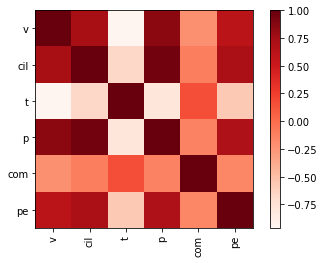

In [62]:
print(df.corr())
plt.imshow(df.corr(), cmap=plt.cm.Reds, interpolation='nearest')
plt.colorbar()
tick_marks = [i for i in range(len(df.columns))]
plt.xticks(tick_marks, df.columns, rotation='vertical')
plt.yticks(tick_marks, df.columns)
plt.show()

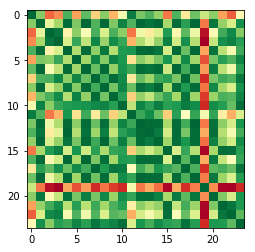

In [63]:
plt.imshow(df.T.corr(), cmap=plt.cm.RdYlGn)
plt.savefig('dataset5.pdf')
plt.show()

In [64]:
matriz_cor = df.T.corr()
print(matriz_cor)
dfm = pd.DataFrame(matriz_cor)
filename = "s5_matrix_corr_pearson2.csv"
dfm.to_csv(path+filename)



          0         1         2         3         4         5         6   \
0   1.000000  0.514535 -0.566566 -0.457244  0.677848 -0.388360  0.624417   
1   0.514535  1.000000  0.151871  0.416250  0.970206  0.535190  0.986982   
2  -0.566566  0.151871  1.000000  0.940454 -0.041323  0.499248  0.064404   
3  -0.457244  0.416250  0.940454  1.000000  0.225396  0.734350  0.318933   
4   0.677848  0.970206 -0.041323  0.225396  1.000000  0.373342  0.979294   
5  -0.388360  0.535190  0.499248  0.734350  0.373342  1.000000  0.430016   
6   0.624417  0.986982  0.064404  0.318933  0.979294  0.430016  1.000000   
7  -0.213548  0.662926  0.687074  0.874212  0.488866  0.885269  0.597245   
8   0.502735  0.986609  0.226148  0.461069  0.937497  0.507864  0.983318   
9  -0.324658  0.535886  0.675748  0.852702  0.359404  0.899429  0.470699   
10  0.090079  0.897535  0.485855  0.730634  0.785776  0.800485  0.822629   
11  0.910257  0.660674 -0.519403 -0.325595  0.818032 -0.138730  0.716082   
12  0.547444